# **LCG Mini-Research — Statistical Validation of a Linear Congruential Generator**
## **Author:** Boris Arutinov



## **Objective**:
The objective of this report is to create an executable Python code for a random number generator (linear congruential generator), describe and analyze it, working in JupyterLab.

## **The structure of the report (sections):**
### 1. **Introduction**:
Explanation of what I am going to use to implement a Python code for a random number generator.
### 2. **Program implementation**:
Python code implementation in the Notebook with comments. 
### 3. **Data validation, visualization and analysis**:
Confirming the correctness of the code, calculating basic statistical measures, and data visualization.
### 4. **Conclusions**:
How JupyterLab was used, lessons learned, and potential improvements.
### 5. **References**:
Listing resources I have used.

## **1. Introduction**:
I am going to use a linear congruential generator formula to write a solution to the task:




The linear congruential generator formula allows us to get pseudorandom numbers from 0 to 1, as we "normalise" our value while calculating xi.

In this formula, r0, m, and a are numbers that we need to choose in order to start the calculation; xi is the ith pseudorandom number in the sequence. Here we calculate the next value using previous calculations. It means that we can calculate our numbers recursively or dynamically. In my opinion, a dynamic approach is better in this case, as we might not face "stack overflow" issues (possible in a recursive approach), and the program might work faster overall.

Now I am going program a function **generate_random_numbers()** using Python programming language. It takes 4 values as input values (r0, m, a, and n) and returns a list with **n** pseudorandom numbers.


## **2. Program implementation**:

In [15]:
def generate_random_numbers(r0, m, a, n):
    cond1 = 0 < r0 < m #a condition that needs to be fullfilled for the generator to work properly
    cond2 = a > 0 #a condition that needs to be fullfilled for the generator to work properly
    cond3 = m > 0 #a condition that needs to be fullfilled for the generator to work properly
    
    #checking if conditions are fullfilled
    if not cond1:
        return "A mandatory condition 0 < r0 < m is not satisfied"
    if not cond2:
        return "A mandatory condition a > 0 is not satisfied"
    if not cond3:
        return "A mandatory condition m > 0 is not satisfied"
    xs = [] #a future list of n pseudorandom numbers
    r1 = r0 #making calculation for the first pseudorandom number in the sequence
    x0 = r1/m
    xs.append(x0)
    for i in range(n-1): #starting iterations to calculate values dynamically
        r1 = (a * r1) % m #calculating r1
        x = r1/m #calculating x
        xs.append(x) #adding a calculated pseudorandom number to the list xs
    return xs #returning a list of n pseudorandom numbers
        

In [17]:

r0 = 2
m = 5
a = 3
n = 6
print(f"A list with {n} pseudorandom numbers, r0 = {r0}, m = {m}, a = {a}")
gen0 = generate_random_numbers(r0, m, a, n)


A list with 6 pseudorandom numbers, r0 = 2, m = 5, a = 3


## **3. Data validation, visualization and analysis**:
### **Data validation**
I have used a function **generate_random_numbers()** to calculate **6** pseudorandom numbers with initial parameters **r0 = 2, m = 5, a = 3**.

We can clearly see that we got a sequence [0.4, 0.2, 0.6, 0.8, 0.4, 0.2] with a **period 4** (after getting 4 different values the cycle repeats due to low m = 5)

To check if everything is programmed well, I am going to show the process of calculation for first **4** numbers (once again, **r0 = 2, m = 5, a = 3**): 

##### 1. r0 = 2, m = 5, **x0 = r0/m = 2/5 = 0.4**.
##### 2. r1 = (a * r0)modm = (3 * 2)mod5 = 1, m = 5, **x1 = r1/m = 1/5 = 0.2**.
##### 3. r2 = (a * r1)modm = (3 * 1)mod5 = 3, m = 5, **x2 = r2/m = 3/5 = 0.6**.
##### 4. r3 = (a * r2)modm = (3 * 3)mod5 = 4, m = 5, **x3 = r1/m = 4/5 = 0.8**.

Manually calculated values correspond to expected values (from the program), therefore our program is **valid**. 


### **Statistical data analysis**

I would like to create 2 more different sequences of pseudorandom values: 
1. The first one with **r0 = 2, m = 109, a = 30, n = 1000**. I have found these parameters myself. The reason for choosing them was the period length = 108 (it is easy to check by enumeration).
2. The second one with **r0 = 3, m = 2^31–1, a = 16807, n = 1000**. I have taken these parameters from the lecture slides (Arena simulation package (historical generator)). For me, it is interesting to compare basic statistical measures of these 2 generators. Of course, I am going to compare them with the first generator too.

At first, I wanted to calculate statistical values for n = 4, n = 108, and n = 1000, respectively, for generators 1, 2, and 3. However, I have decided to use **n = 1000** for **all** generators. In my opinion, this condition can demonstrate the quality of each generator more precisely.

For each generator I am going to calculate **mean, median, variance, standard deviation, Pearson correlation coefficient between the pseudorandom numbers series and its shifted self, and period length**. 

For statistical calculations I am using **numpy** and **pandas**.

Also I am going to visualize generated pseudorandom numbers as a histogram using **matplotlib.pyplot**.


The visualization of pseudorandom numbers generated by the first generator


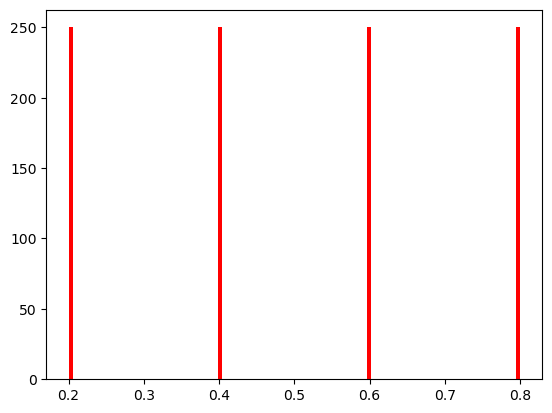

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Result for first 

def statistical_measures(nums):
    gen0p = pd.Series(nums) #converting pseudorandom numbers list into pandas series to find a correlation coefficient
    mean = np.mean(nums) #finding a mean value
    median = np.median(nums) #finding a median value
    variance = np.var(nums) #fi|nding a variance value
    standard_deviation = np.std(nums) #finding a standard deviation value
    corcoef = gen0p.autocorr(lag=1) #finding a Pearson correlation coefficient value, lag is a "shift" value
    
    periodlen = 1
    #finding period length
    while periodlen < len(nums):
        if nums[periodlen] == nums[0]: break
        periodlen += 1
    
    nl = '\n'    
    return f"mean = {mean}, median = {median}, variance = {variance}, standard_deviation = {standard_deviation}, Pearson correlation coefficient between the pseudorandom numbers series   and its shifted self = {corcoef}, Length of period = {periodlen}"


gen0 = generate_random_numbers(2, 5, 3, 1000) #regenerating values for the first generator to get the length 1000
plt.hist(gen0, bins = 100, rwidth=0.9, color='red') #visualization
#statistical measures for the first generator
print("The visualization of pseudorandom numbers generated by the first generator")

In [22]:
print("The statistical measures for the first generator are:", "\n", statistical_measures(gen0))

The statistical measures for the first generator are: 
 mean = 0.5, median = 0.5, variance = 0.05000000000000002, standard_deviation = 0.22360679774997902, Pearson correlation coefficient between the pseudorandom numbers series   and its shifted self = 0.0006012025979657781, Length of period = 4


The visualization of pseudorandom numbers generated by the second generator


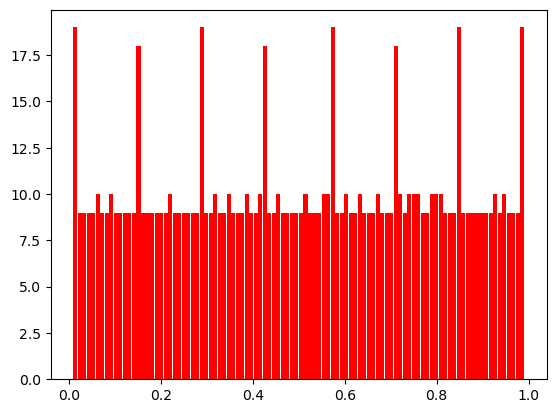

In [24]:
gen1 = generate_random_numbers(2, 109, 30, 1000) #regenerating values for the second generator
plt.hist(gen1, bins = 100, rwidth=0.9, color='red') #visualization
print("The visualization of pseudorandom numbers generated by the second generator")

In [26]:
print("The statistical measures for the second generator are:", "\n", statistical_measures(gen1))

The statistical measures for the second generator are: 
 mean = 0.5017981651376148, median = 0.5045871559633027, variance = 0.08161380220520158, standard_deviation = 0.2856812948115462, Pearson correlation coefficient between the pseudorandom numbers series   and its shifted self = 0.0226439586967197, Length of period = 108


The visualization of pseudorandom numbers generated by the third generator


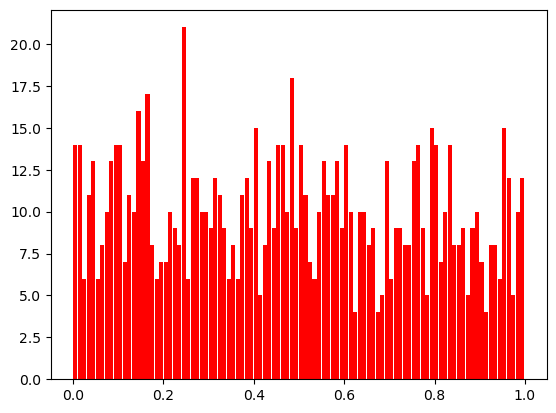

In [28]:
gen2 = generate_random_numbers(3, 2**31 - 1, 16807, 1000) #regenerating values for the second generator
plt.hist(gen2, bins = 100, rwidth=0.9, color='red') #visualization
print("The visualization of pseudorandom numbers generated by the third generator")

In [30]:
print("The statistical measures for the second generator are:", "\n", statistical_measures(gen2))

The statistical measures for the second generator are: 
 mean = 0.48115445255774747, median = 0.4775789482414624, variance = 0.08248257459841715, standard_deviation = 0.28719779699436615, Pearson correlation coefficient between the pseudorandom numbers series   and its shifted self = -0.0016638991240699246, Length of period = 1000


### **Now I am going to summarize all results and analyze them**:

### **Generator 1**
#### **Statistical measures**: 

##### **mean** = 0.5
##### **median** = 0.5
##### **variance** = 0.05000000000000002
##### **standard_deviation** = 0.22360679774997902
##### **Pearson correlation coefficient** = 0.0006012025979663352
##### **Length of period** = 4


### **Generator 2**
#### **Statistical measures**: 
##### **mean** = 0.5017981651376148
##### **median** = 0.5045871559633027
##### **variance** = 0.08161380220520158
##### **standard_deviation** = 0.2856812948115462
##### **Pearson correlation coefficient** = 0.02264395869671971
##### **Length of period** = 108

### **Generator 3**
#### **Statistical measures**: 
##### **mean** = 0.48115445255774747
##### **median** = 0.4775789482414624
##### **variance** = 0.08248257459841715
##### **standard_deviation** = 0.28719779699436615
##### **Pearson correlation coefficient** = -0.0016638991240699459
##### **Length of period** = 1000 (actually, it is around 2 * 10^9, but the program shows 1000, as the sample size is 1000)

## **4. Conclusions**:
Working with JupyterLab was a great experience. Even though I worked with it before, I still managed to learn many new things. I find JupyterLab a powerful tool to combine code with a programmer’s notes, as it provides users with a wide spectrum of possibilities like text formatting, LaTeX, etc. I used JupyterLab to create the whole report and Python code, using features mentioned above.

Speaking about things I have learned, I have gained valuable knowledge working with Markdown Cells in Jupyter Notebook. Moreover, I took a chance to work with Python libraries “numpy”, “matplotlib”, and “pandas”.

As for potential improvements to the code, there are various combinations of r0, a, and m that, after several calculations, make the generator repeat the same value infinitely. It would be great to handle these cases in the code, avoiding incorrectly working generators. Another thing that can be improved is a generator period length calculator. In some cases, the length of the period is higher than the length of the sample we are generating. In my code, we cannot estimate the real period length in such cases. This should be improved. As for data analysis improvement, more than 3 generators should be tested to make a comparison between them clearer and reasonable. Moreover, there are many other statistical measures that can be used for analysis.

To sum up, I would like to repeat that this assignment was a great opportunity to get experience working with JupyterLab and conduct a small research project about pseudorandom number generation.



## **5. References**:
1. LaTeX's mathematical expressions https://www.overleaf.com/learn/latex/Mathematical_expressions.
2. JupiterHub on RTU HPC platform https://hpc.rtu.lv/jupyterhub/?lang=en .
3. Convert JupiterNotebook to pdf https://www.vertopal.com/en/convert/ipynb-to-pdf.
4. Jupiternotebook Markdown Cells https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html.5/ 
5. Statistical measures from the numpy library https://numpy.org/doc/2.1/reference/routines.statistics.html.
6. Pearson correlation coefficient from the pandas library https://pandas.pydata.org/docs/reference/api/pandas.Series.autocorr.html.
7. Histograms from the matplotlib library https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html.